# ATLAS AD TRIGGERS HLT STUDY: PHYSICS RUNS WITH REGIONS LABELS

**Author:** Claire  
**Date:** 2025-02-13 
**Goals:** 
- Data inspection (duplicates, MET, etc)
- Using ntuples from Max from Feb. 2025: EB_test and 5 regular physics runs
- No signal (so far)
- Plot distributions post HLT-AD trigger for objects  
- See the "physics" that the HLT-AD trigger is selecting

**Files:** Ntuples from Max with AD scores by region.  
Object pT should be rescaled to original values.

In [ ]:
# %% [python]
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Custom modules
import utils.dataframes_loader as df_loader
import utils.data_inspector as di
import utils.plot_event_display as evt_disp
import utils.plot_violin as pviolin

data_dir = '/Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading data
Storing each dataset-tag (EB_test and regular physics runs) in a dataframe.

In [15]:
# To inspect all dictionaries:
#df_loader.inspect_h5_keys(data_dir, selected_tag="EB_test")

# Loading all datasets
dataframes = df_loader.load_dataframes_from_h5(data_dir)

Loaded physMain_474926GRLReal from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/physMain_474926GRLReal.h5
Loaded mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300 from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_RS_G_hh_bbbb_AutoWidth_c10_M300.h5
Loaded mc23e_ChiPlusChiMinus100_99_0p3ns from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_ChiPlusChiMinus100_99_0p3ns.h5
Loaded mc23e_HNLeemu from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_HNLeemu.h5
Loaded EB_test from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/EB_test.h5
Loaded mc23e_ttbar_2lep from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw_regions/mc23e_ttbar_2lep.h5
Loaded physMain_474448GRLReal from /Users/cdavid/Workarea/data/AD_ATLAS_TRIGGERS/mmcohen_ntupes_with_AD_scores_raw

# Data inspection
Focusing on `EB_test` for now.

## $p_T$ ranges

In [18]:
di.print_tables_pt_ranges(dataframes, 'EB_test')


Jets pT ranges for EB_test (percentages)
----------------------------------------------------------------------------------------------------
Range            j0pt          j1pt          j2pt          j3pt          j4pt          j5pt          
----------------------------------------------------------------------------------------------------
pt = 0           0.2%          0.7%          1.9%          3.7%          6.3%          9.6%     
0 < pt < 50     96.1%         98.4%         98.0%         96.2%         93.7%         90.4%     
pt ≥ 50          3.7%          0.8%          0.1%          0.0%          0.0%          0.0%     
----------------------------------------------------------------------------------------------------

Leptons pT ranges for EB_test (percentages)
----------------------------------------------------------------------------------------------------
Range            e0pt          e1pt          e2pt          mu0pt         mu1pt         mu2pt         
--------------

The MET percentages are not making sense. To investigate.

## Event display (transverse plane)

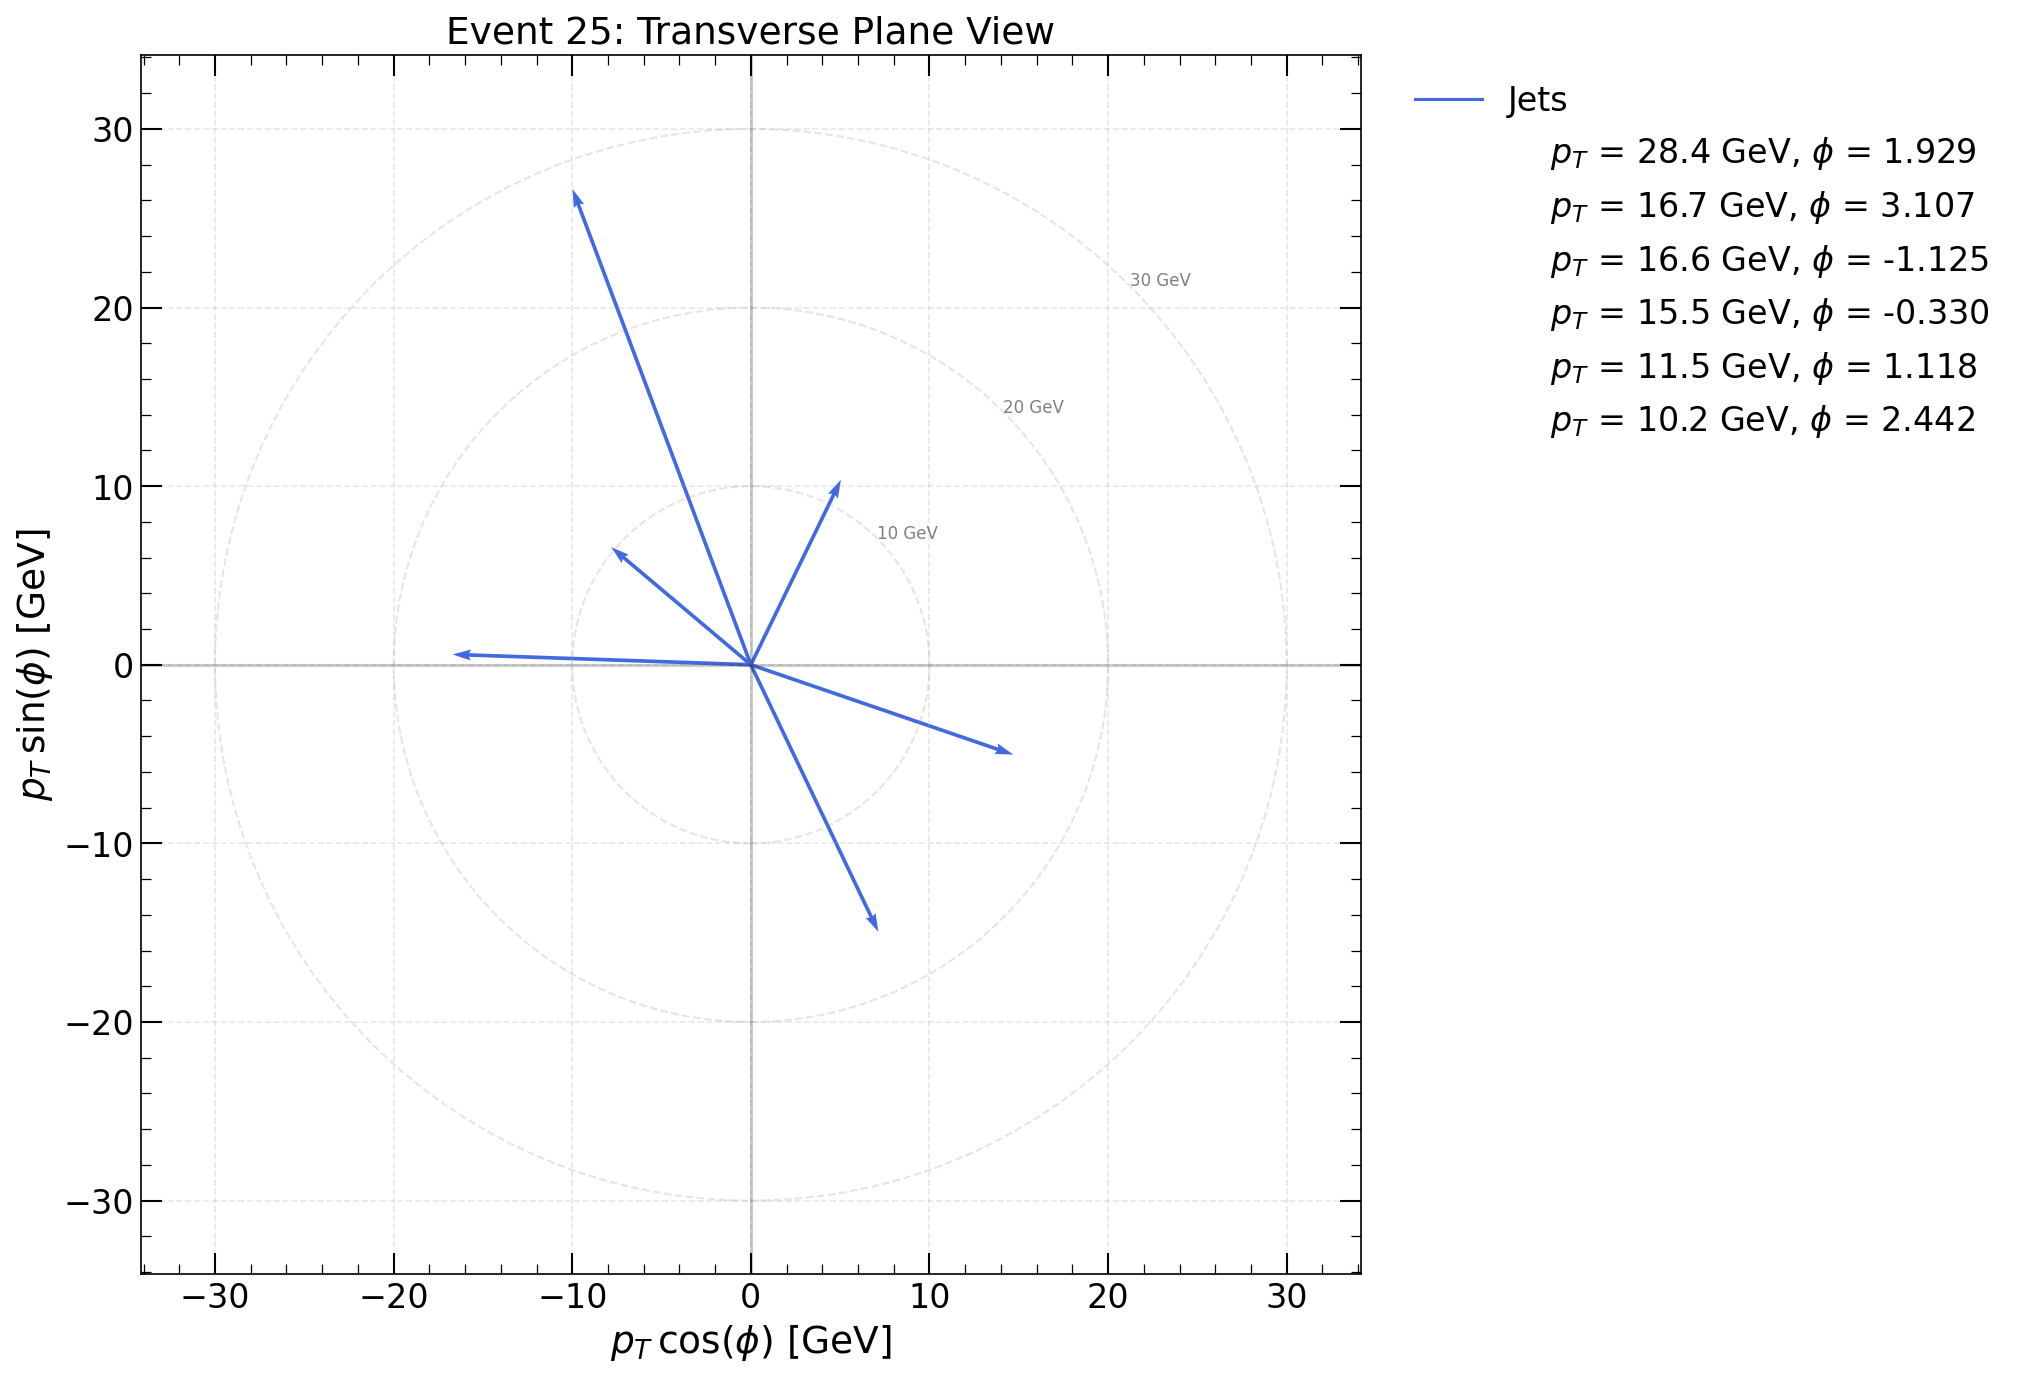

In [40]:
fig, ax = evt_disp.plot_event_2D(dataframes['EB_test'], event_idx=25)

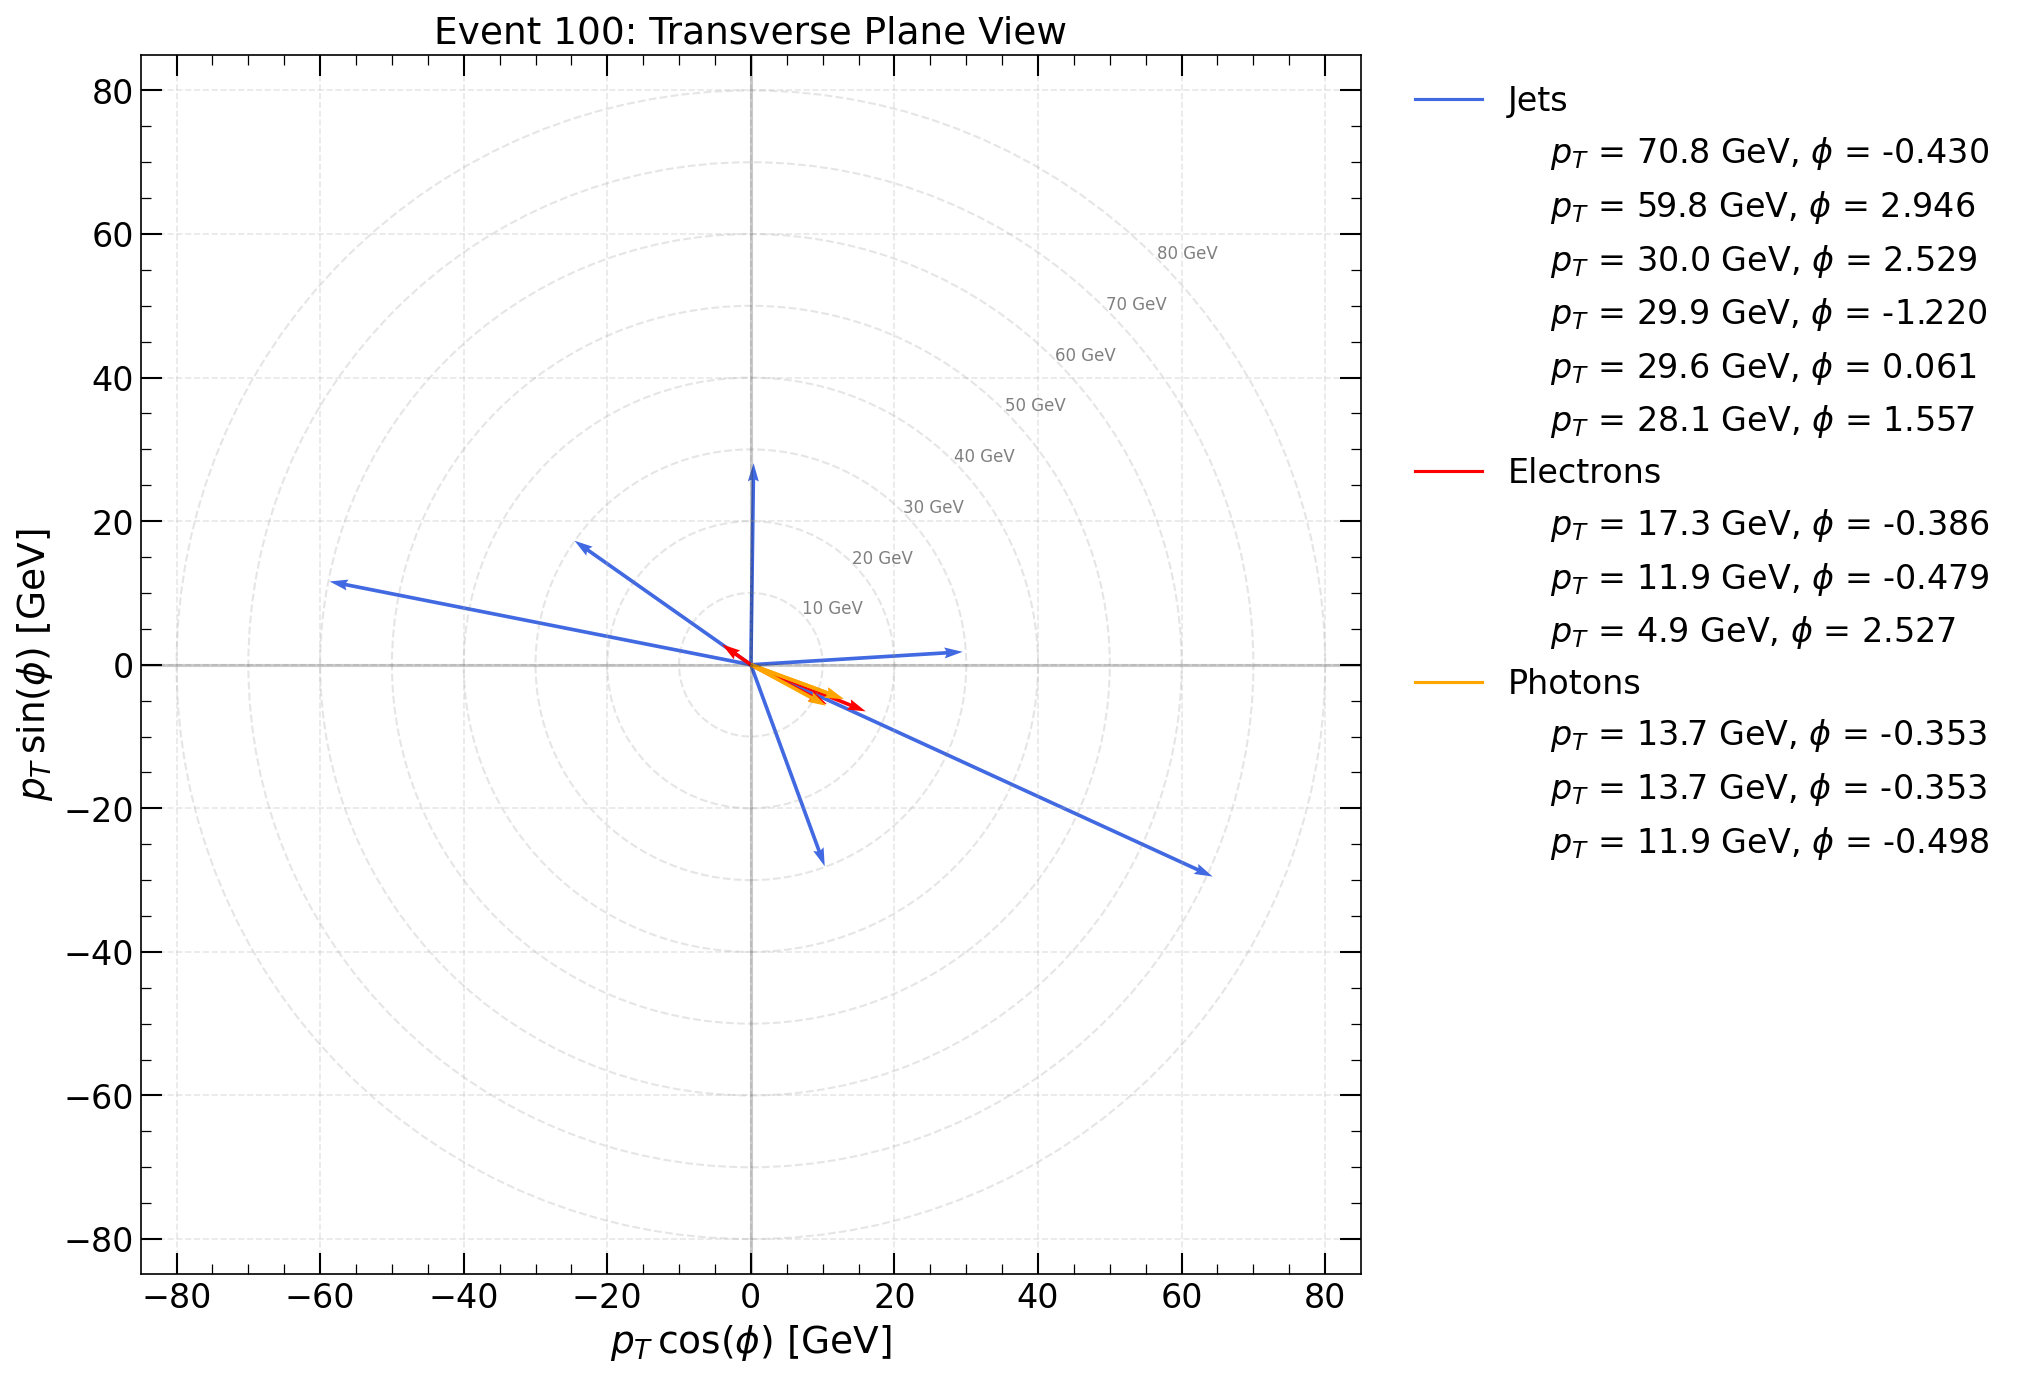

In [39]:
fig, ax = evt_disp.plot_event_2D(dataframes['EB_test'], event_idx=100)

## AD scores across datasets

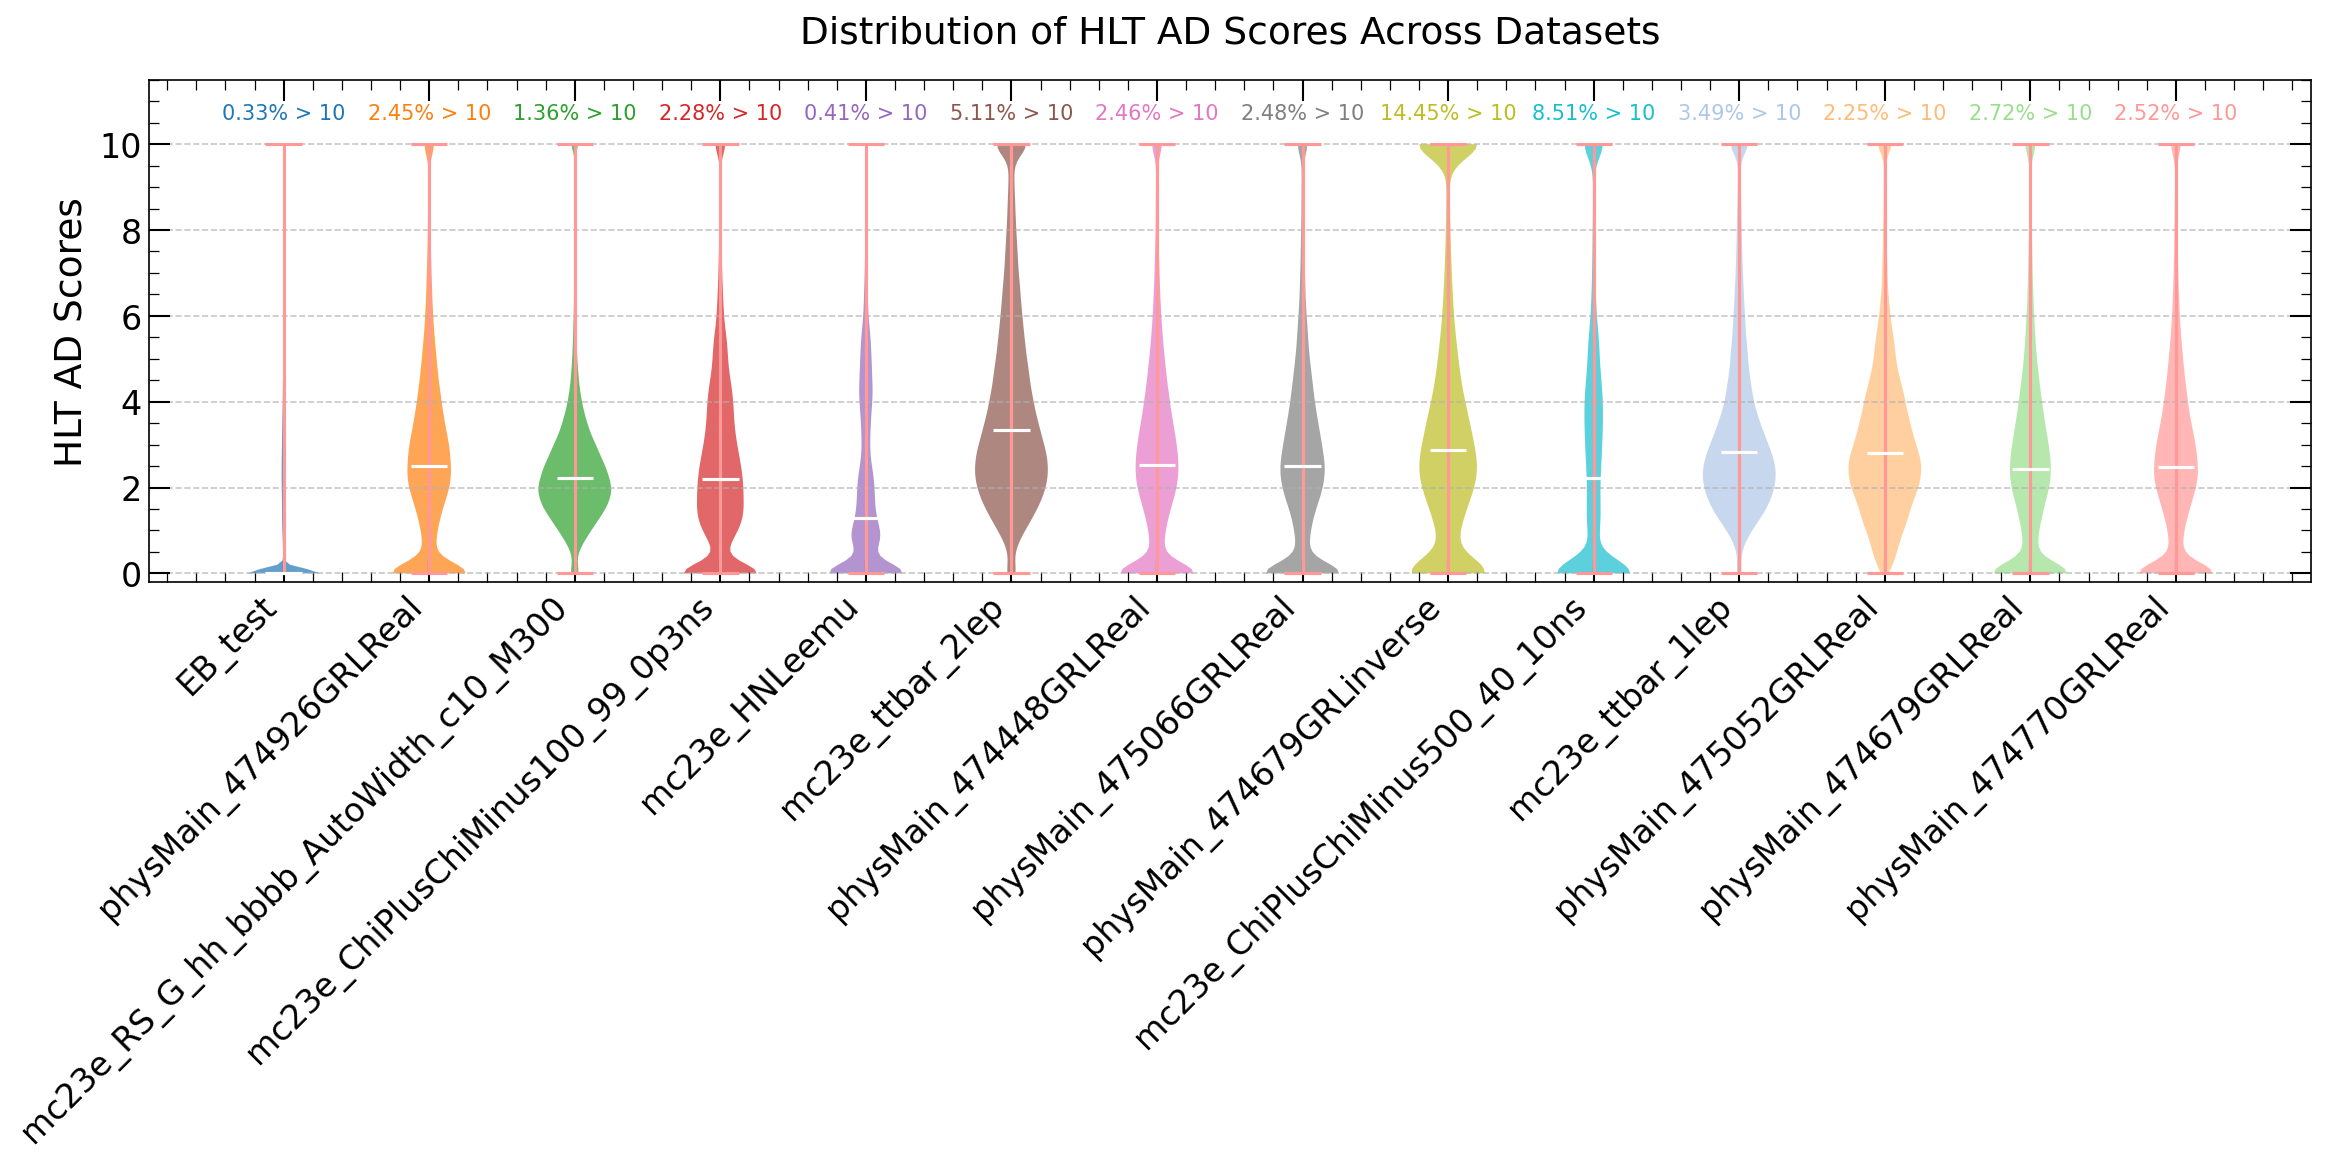

In [41]:
fig, ax = pviolin.plot_AD_scores_violin(dataframes, score_limit=10)

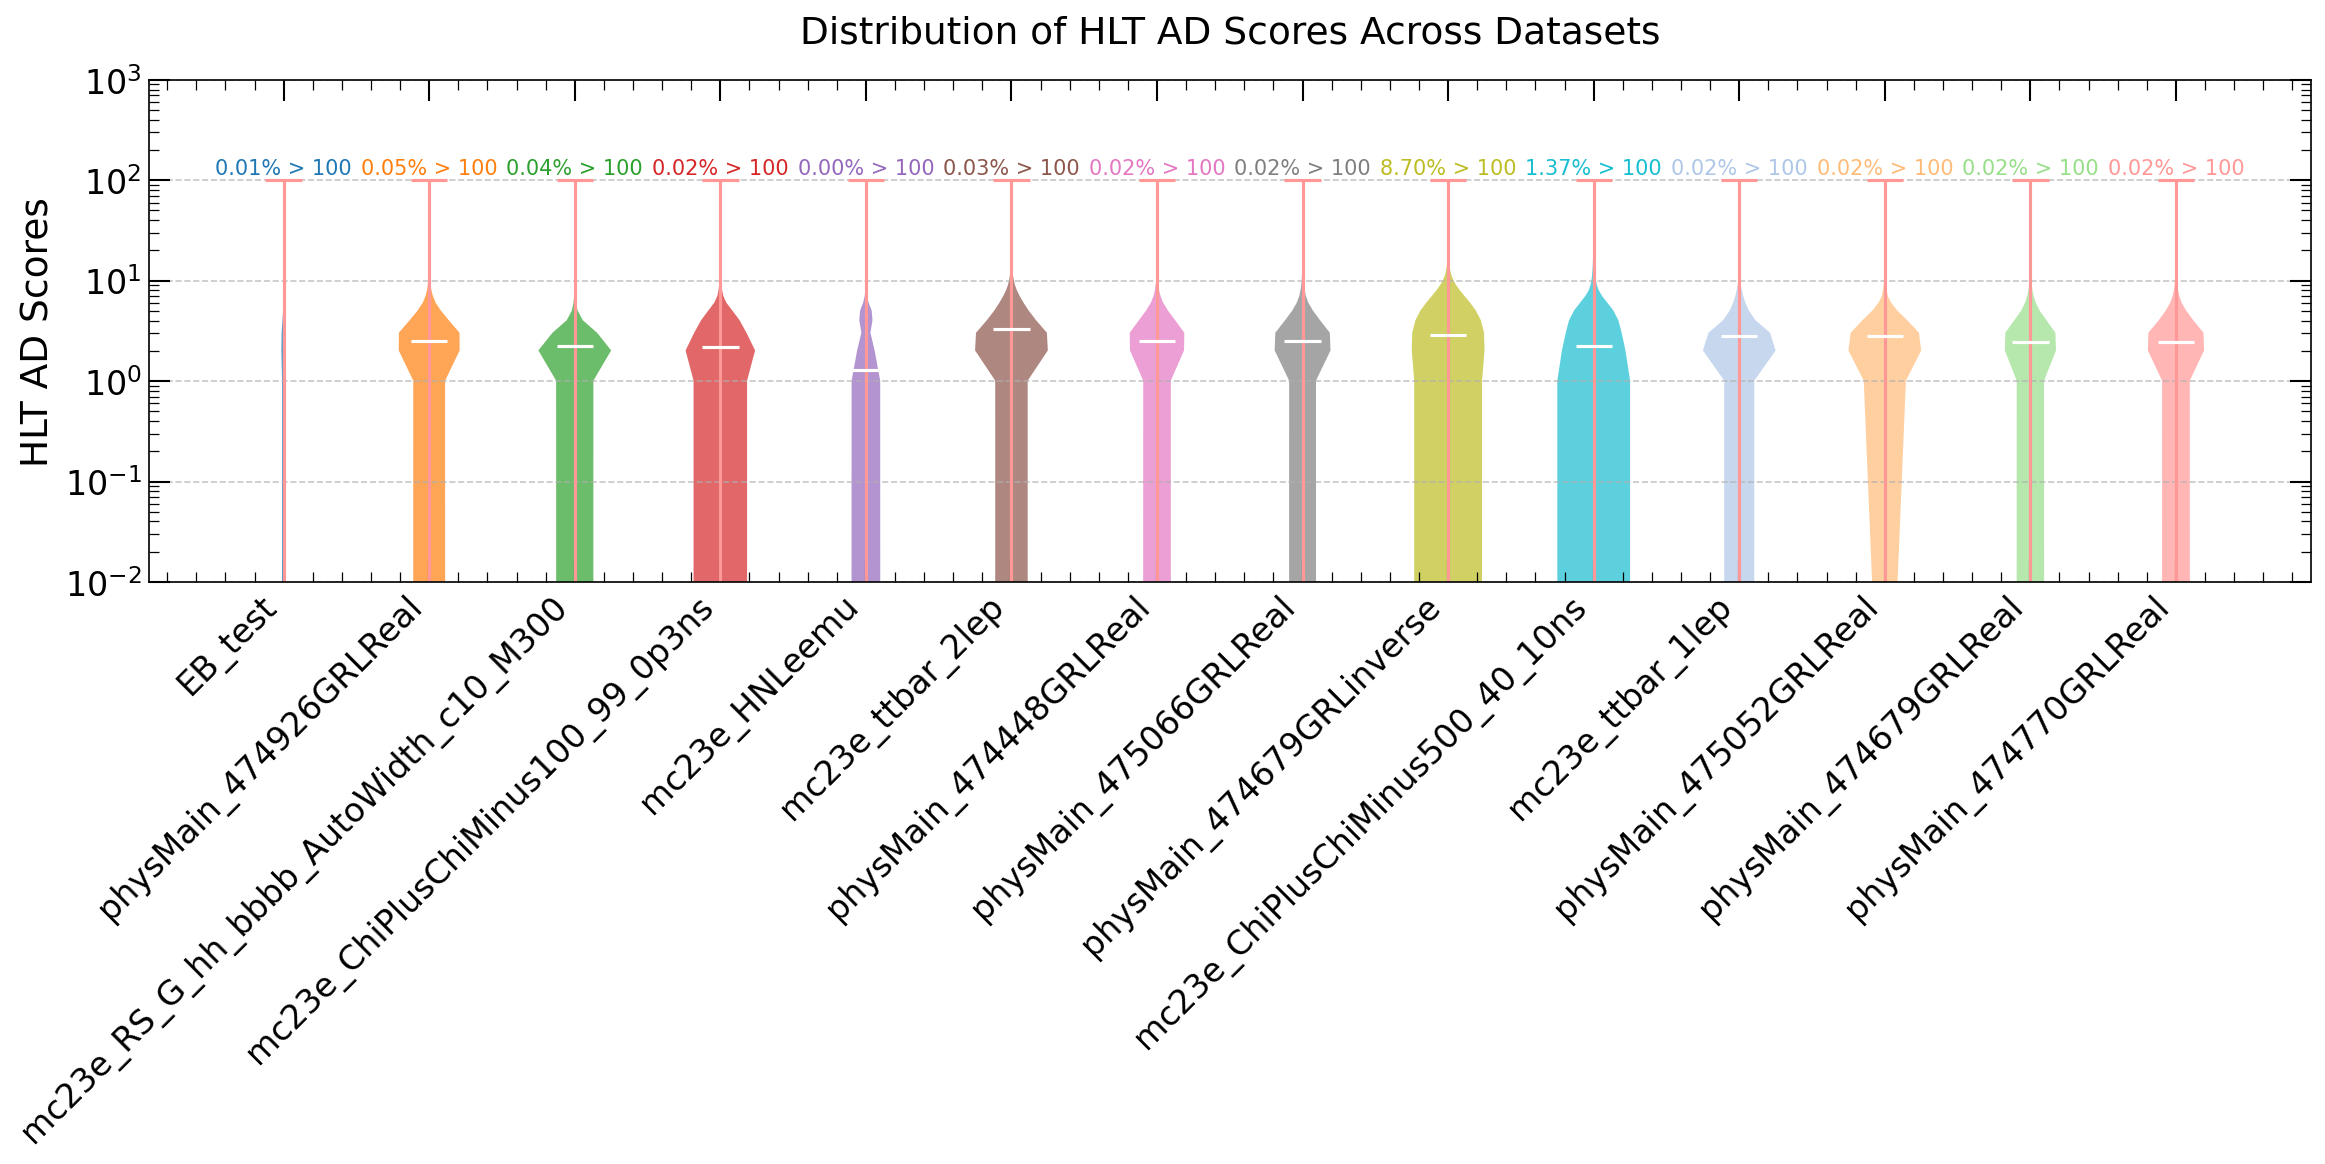

In [42]:
fig, ax = pviolin.plot_AD_scores_violin(dataframes, score_limit=100, ylog=True)